# Customer Churn Analysis Project


# Importing Libraries

In [1]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [2]:
#Import the dataset

data= pd.read_csv("churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Importing the dataset and see all columns with first five rows.

# Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

So as we have to find out discrete values so this problem refers to Classification Problem

# Shape of data with number of rows and columns

In [3]:
data.shape

(7043, 21)

There are 7043 Rows and 21 Columns in dataset

# Detailed description

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value.

# Datatypes of all columns

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We have Integer data type ----> SeniorCitizen and tenure only.

object datatypes ----> customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurit, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, TotalCharges and Churn

float data type ----> MonthlyCharges

all are independent variable accept Churn. Churn is a target variable.



# Checking is there any null value

In [6]:
#check is there any null value present in any column

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in whole dataset. so, we can proceed further

# Visualization of null values

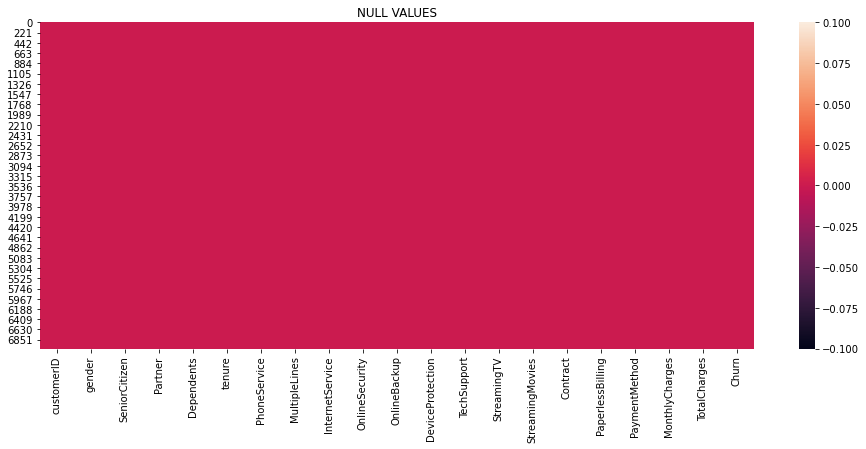

In [7]:
plt.figure(figsize=[16,6])
sn.heatmap(data.isnull())
plt.title("NULL VALUES")
plt.show()

As shown in plot there is no white lines in whole dataset.

# Before visualization we need to convert encode target variable

In [8]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
# Replace Attrition column to binary encoder
data['Churn'] = data['Churn'].replace({'Yes':1, 'No':0})

after converting target variable the Yes will become 1 and No will become 0.

# EDA (Exploratory Data Analysis)

# Univariate Analysis

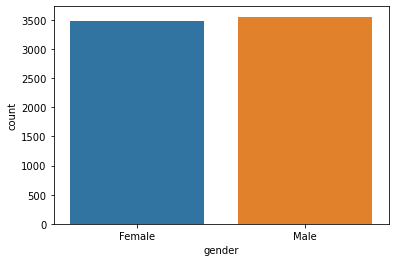

In [11]:
#visualization of variables 
sn.countplot(data["gender"])
plt.show()

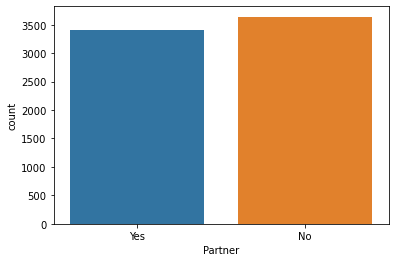

In [12]:
#visualization of variables 
sn.countplot(data["Partner"])
plt.show()

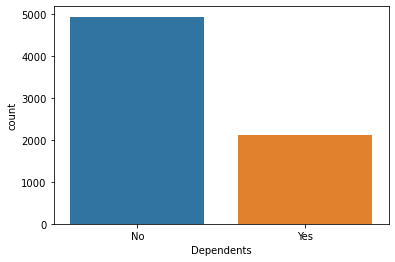

In [13]:
#visualization of variables 
sn.countplot(data["Dependents"])
plt.show()

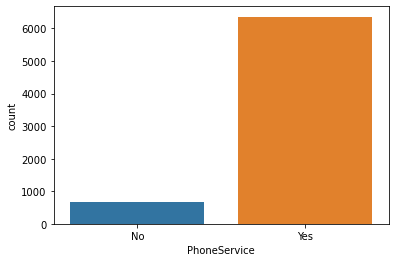

In [14]:
#visualization of variables 
sn.countplot(data["PhoneService"])
plt.show()

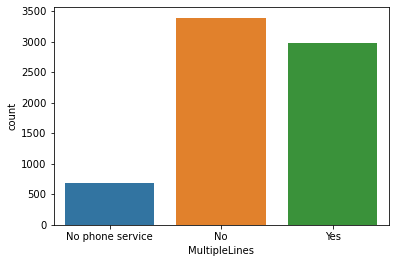

In [15]:
#visualization of variables 
sn.countplot(data["MultipleLines"])
plt.show()

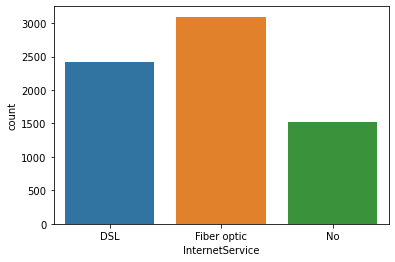

In [16]:
#visualization of variables 
sn.countplot(data["InternetService"])
plt.show()

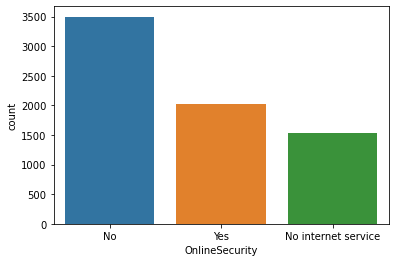

In [17]:
#visualization of variables 
sn.countplot(data["OnlineSecurity"])
plt.show()

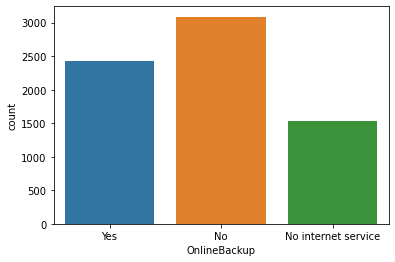

In [18]:
#visualization of variables 
sn.countplot(data["OnlineBackup"])
plt.show()

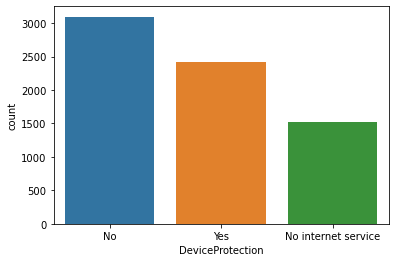

In [19]:
#visualization of variables 
sn.countplot(data["DeviceProtection"])
plt.show()

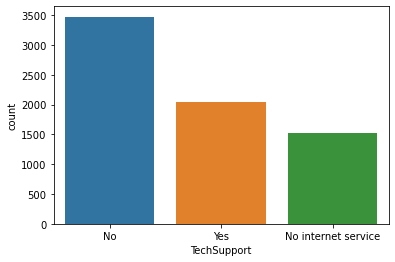

In [20]:
#visualization of variables 
sn.countplot(data["TechSupport"])
plt.show()

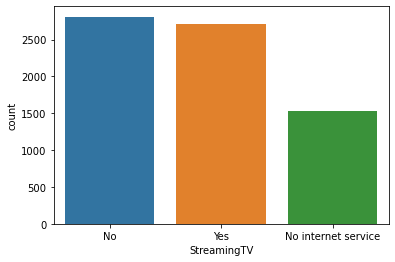

In [21]:
#visualization of variables 
sn.countplot(data["StreamingTV"])
plt.show()

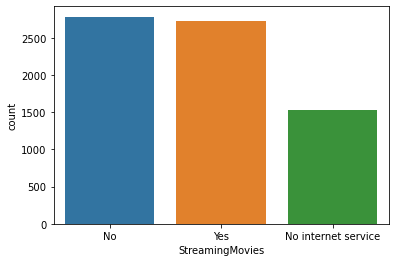

In [22]:
#visualization of variables 
sn.countplot(data["StreamingMovies"])
plt.show()

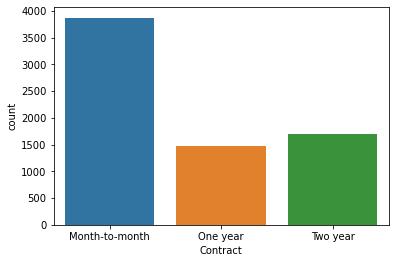

In [23]:
#visualization of variables 
sn.countplot(data["Contract"])
plt.show()

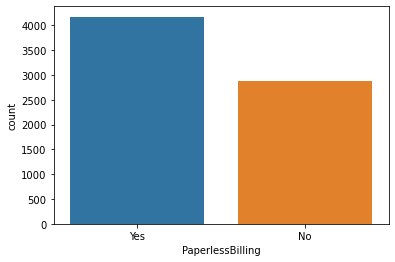

In [24]:
#visualization of variables 
sn.countplot(data["PaperlessBilling"])
plt.show()

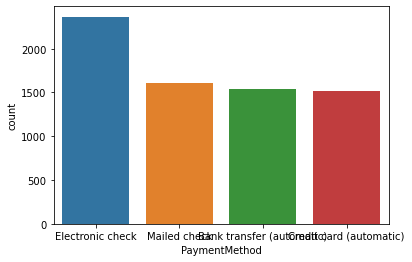

In [25]:
#visualization of variables 
sn.countplot(data["PaymentMethod"])
plt.show()

In [26]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

# Distplot

In [27]:
fe = data[["SeniorCitizen", "tenure", "MonthlyCharges", "Churn"]]

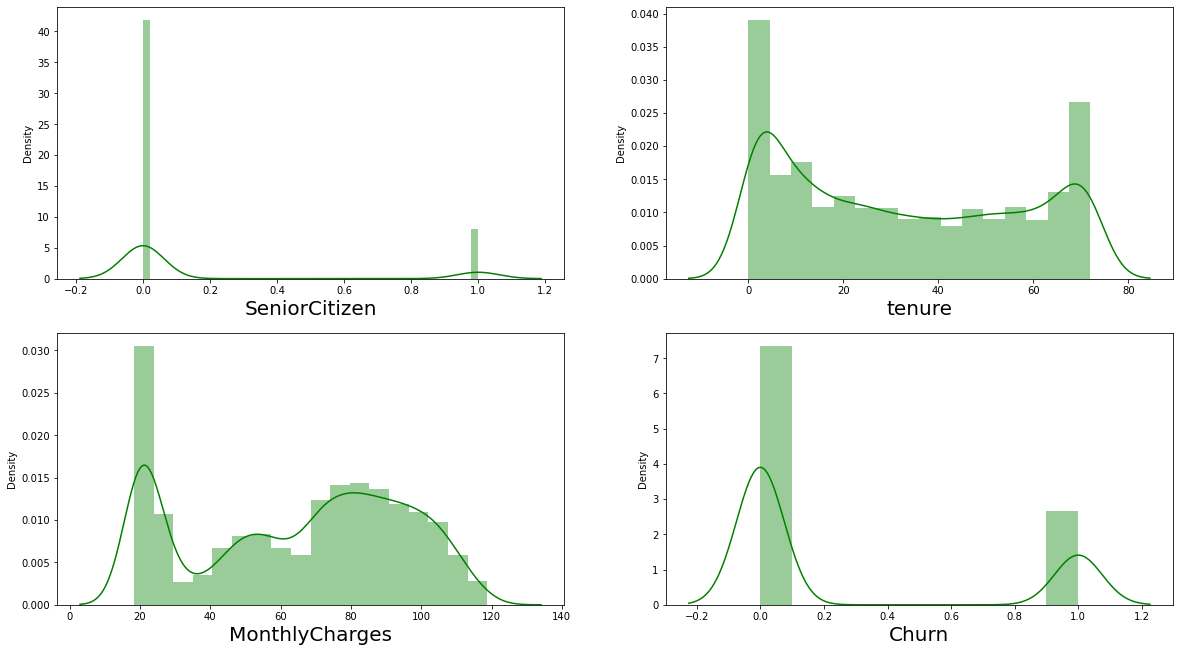

In [28]:
#Relationship Visualizing

plt.figure(figsize = (20,35), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in distplot almost every input variable are normally distributed. no skewness is present in it.

In [29]:
data.skew()#skewness in data

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
Churn             1.063031
dtype: float64

Quality is a targate variable and it is having two classes. so, it is a binaryclassification problem.



# Analysis through boxplot

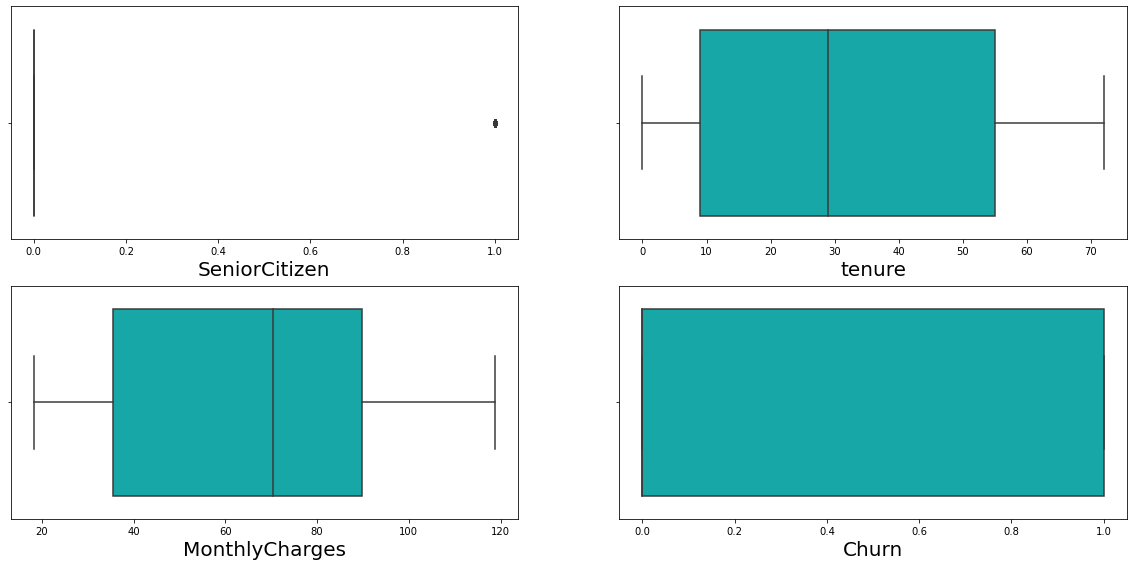

In [30]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15: # as we see there are therteen columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As we can see all columns are not having outliers, so we need to proceed further.

# Histplot

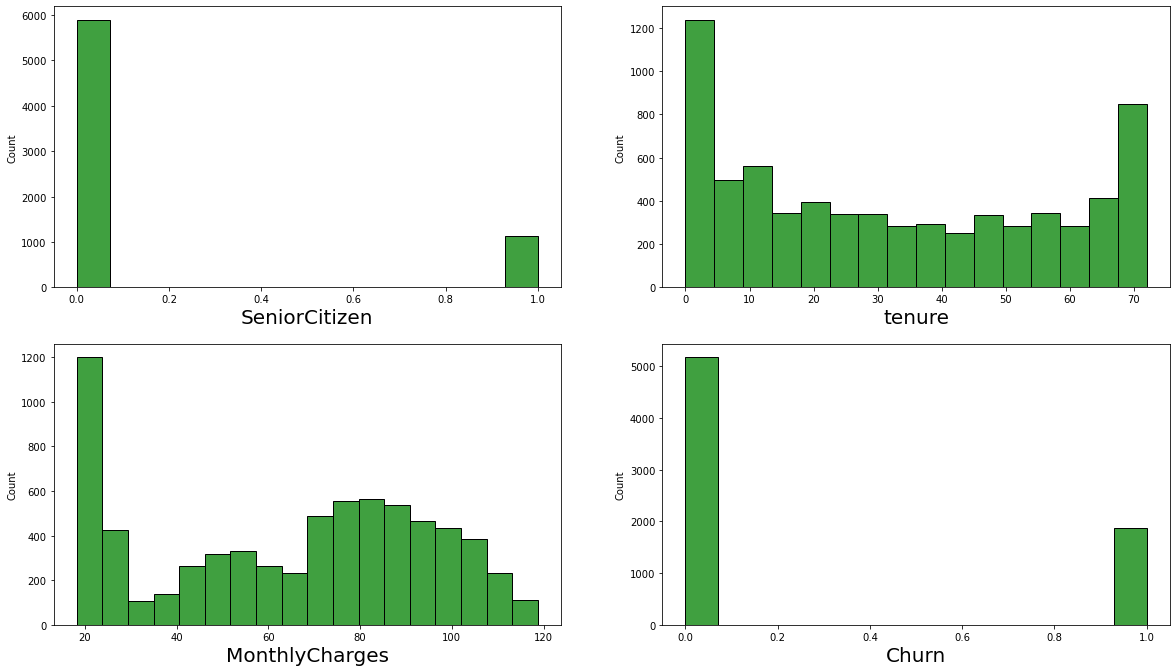

In [31]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 10: # as we see there are thirtheen columns in the data
        ax = plt.subplot(5,2,plotnumber)
        sn.histplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

we can see all variables are normally distributed, skewness are not present it.

# Bi variate analysis

In [32]:
feature = data[["SeniorCitizen", "tenure", "MonthlyCharges", "Churn"]]

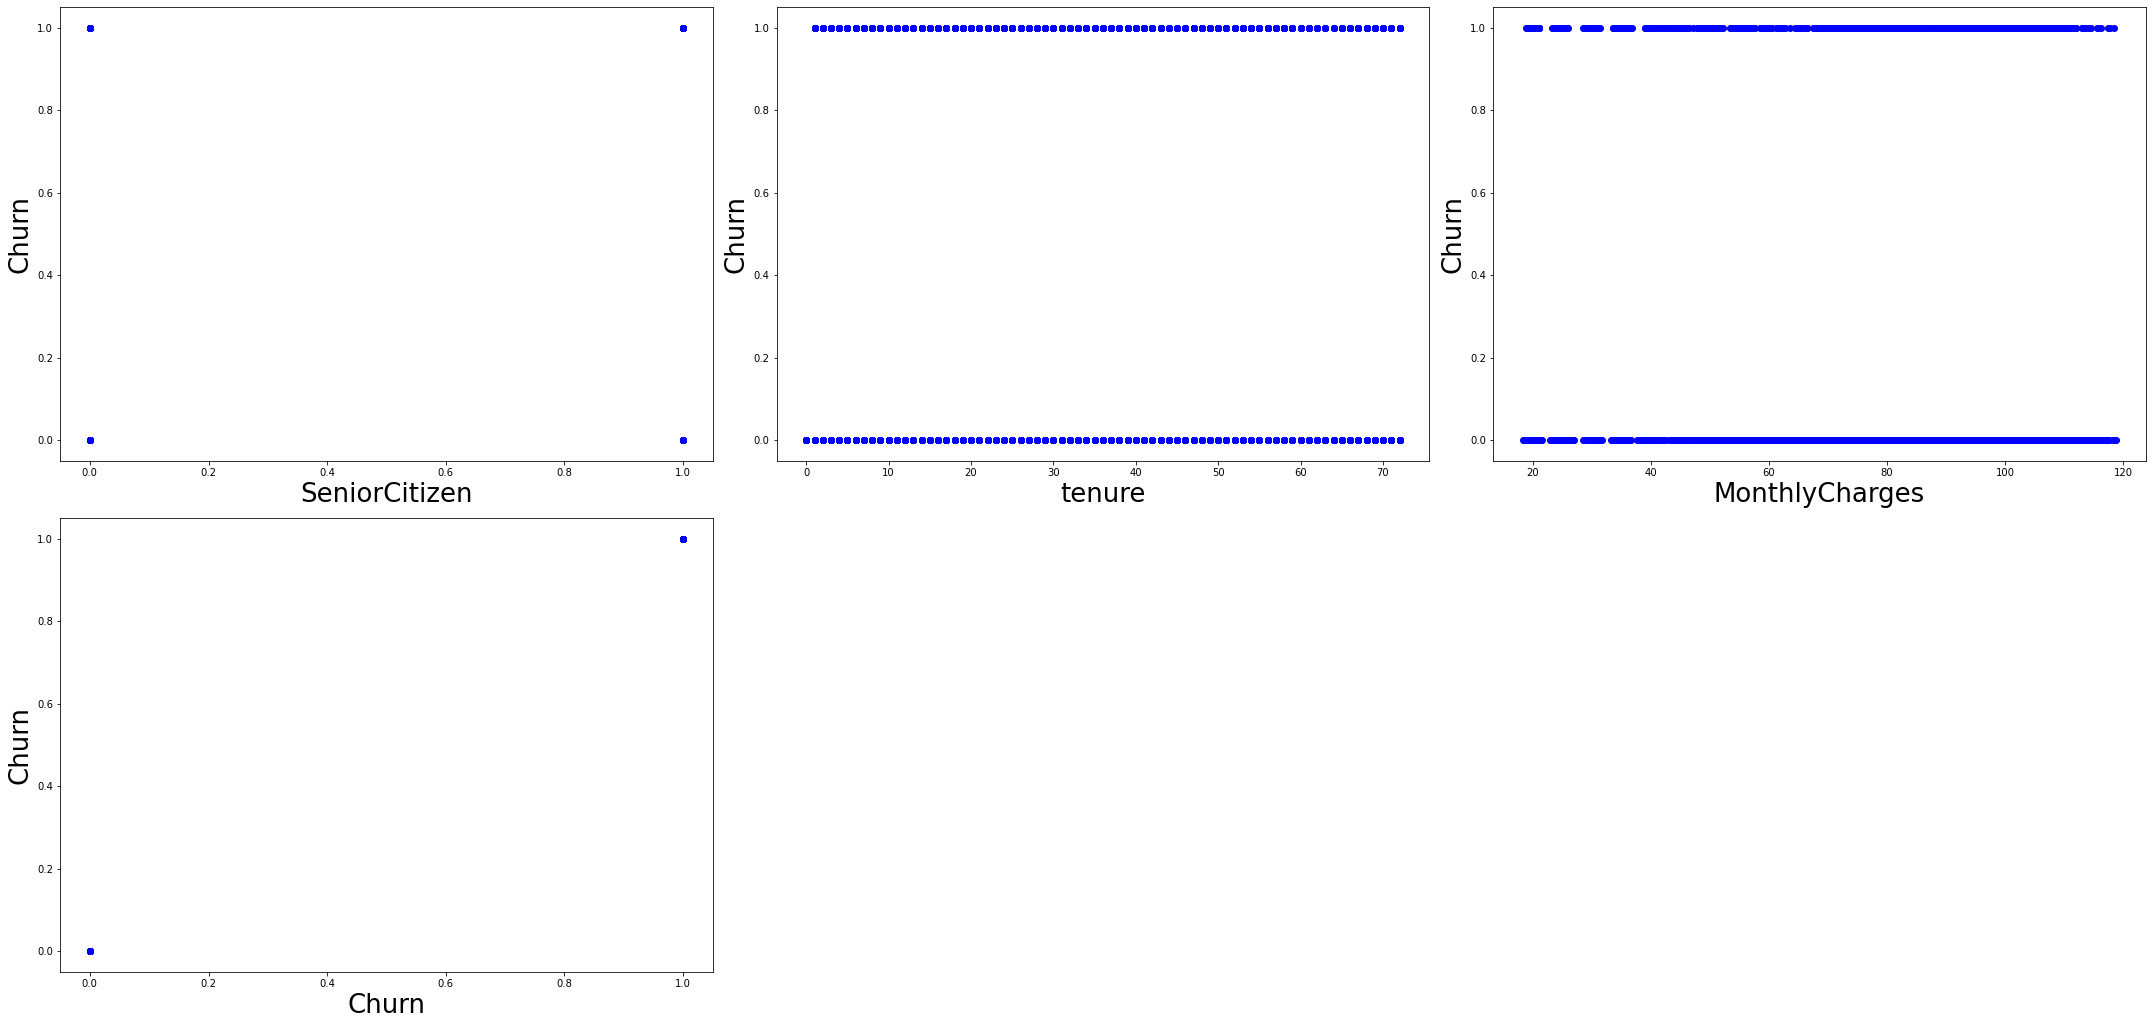

In [33]:
#Relationship Visualizing

plt.figure(figsize = (30,35), facecolor = 'white')
plotnumber = 1

for column in feature:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(feature[column],feature['Churn'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('Churn', fontsize=26)
    plotnumber += 1
plt.tight_layout()


As we have seen in the plot some outliers are not present in it.

# Multi Variate analysis


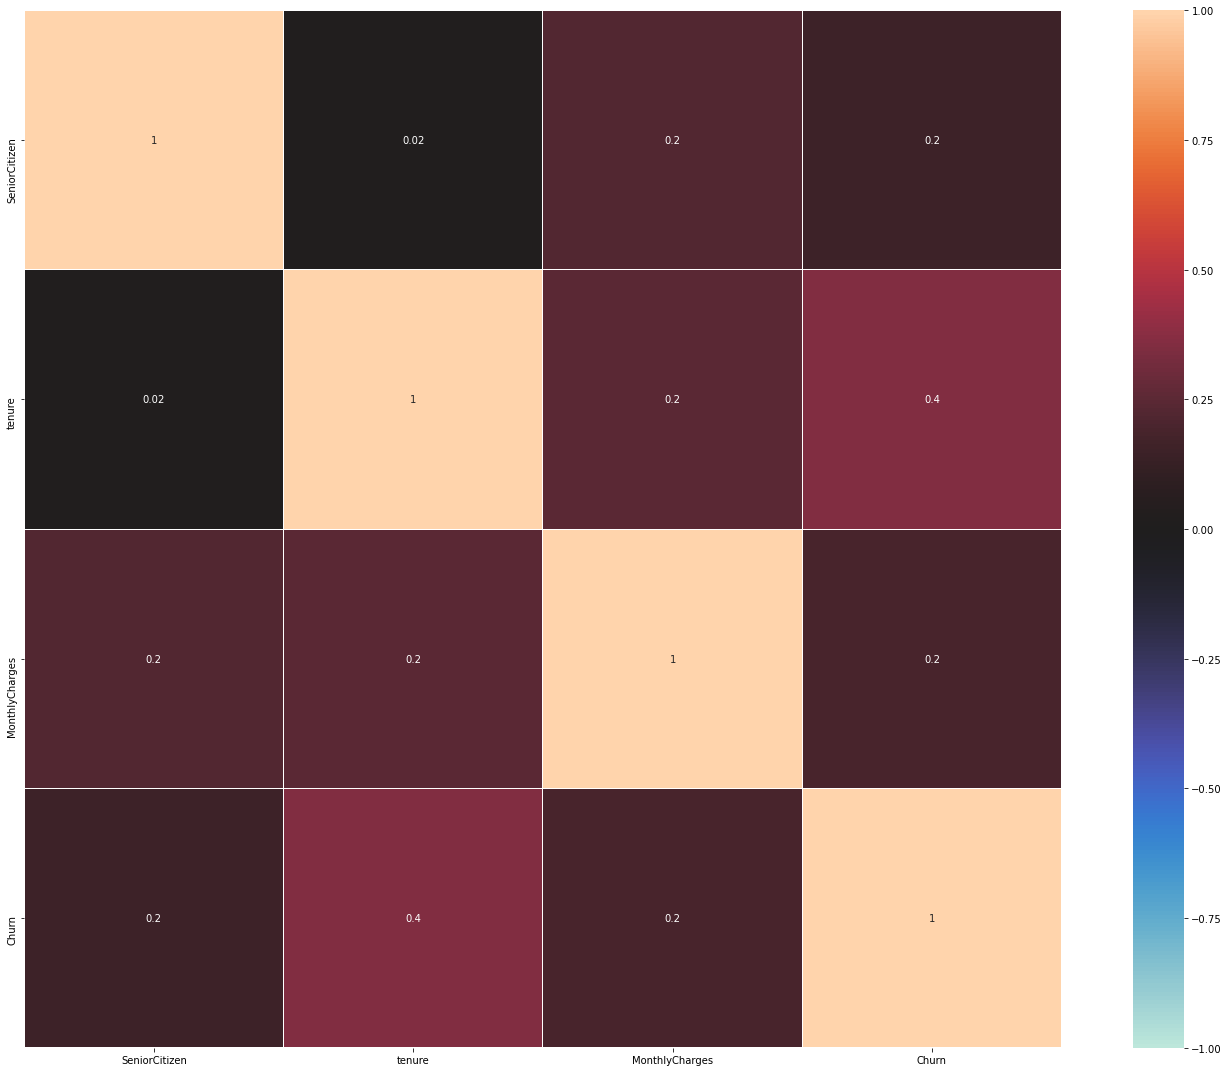

In [34]:
data_cor = data.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(data_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

# Find out which columns are positively and negatively correlated with each other

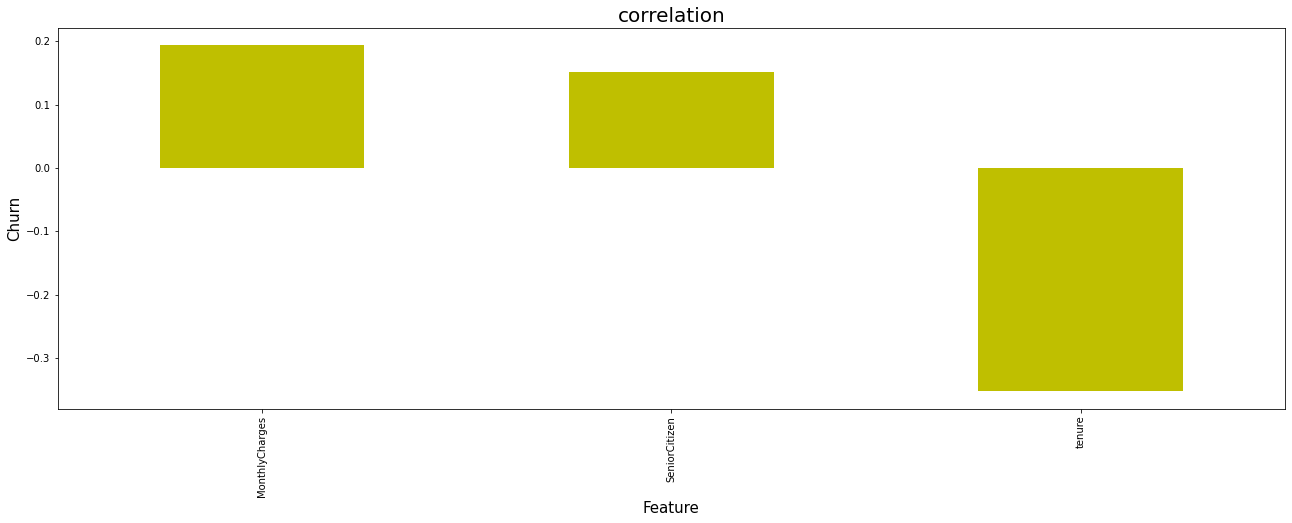

In [35]:
plt.figure(figsize=(22,7))
data.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Churn', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

# Pairplot

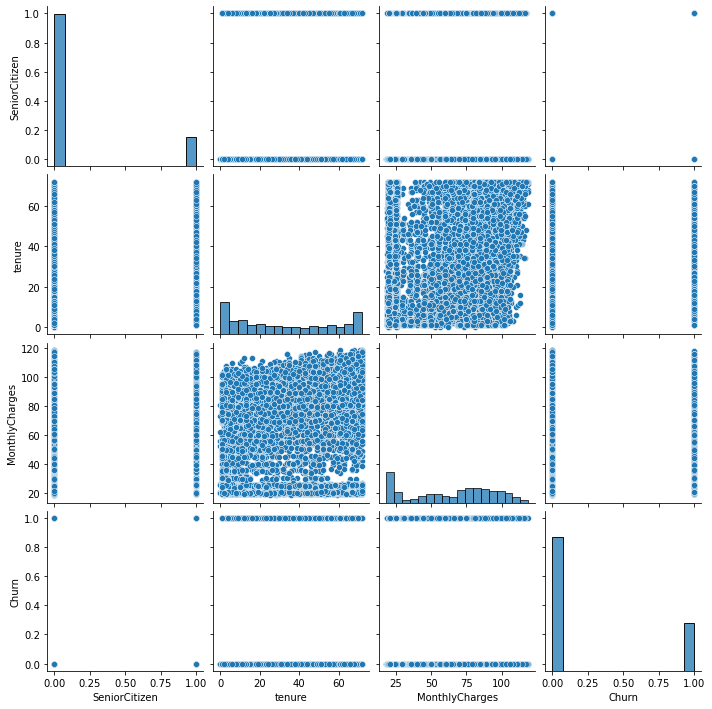

In [36]:
sn.pairplot(data)
plt.show()

In above pairplot we can see each and every coloumn relationship with each other.

After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

# Encoding/Droping

In [37]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


# 1. Drop Loan_ID column

In [38]:
# Check unique values of customerID column
data['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [39]:
data['customerID'].value_counts()

9447-YPTBX    1
8445-DNBAE    1
7396-VJUZB    1
5133-VRSAB    1
1682-VCOIO    1
             ..
0412-UCCNP    1
2049-BAFNW    1
7495-OOKFY    1
3446-QDSZF    1
2808-CHTDM    1
Name: customerID, Length: 7043, dtype: int64

as we can see in customerID all values are having unique count, so we can drop that column.

In [40]:
#drop customerID column
data=data.drop(['customerID'], axis=1)

# 2.Gender

In [41]:
# Check unique values of gender column
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [42]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

# 3. Partner

In [43]:
# Check unique values of Partner column
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

# 4.Dependents

In [45]:
# Check unique values of Dependents column
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

# 5.PhoneService

In [47]:
# Check unique values of PhoneService column
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

# 6.MultipleLines

In [49]:
# Check unique values of MultipleLines column
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [50]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

# 7.InternetService

In [51]:
# Check unique values of InternetService column
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [52]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

# 8.OnlineSecurity

In [53]:
# Check unique values of OnlineSecurity column
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [54]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

# 9.OnlineBackup


In [55]:
# Check unique values of OnlineSecurity column
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [56]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

# 10. DeviceProtection

In [57]:
# Check unique values of DeviceProtection column
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [58]:
data['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

# 11. TechSupport

In [59]:
# Check unique values of TechSupport column
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [60]:
data['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

# 12.StreamingTV

In [61]:
# Check unique values of StreamingTV column
data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [62]:
data['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

# 13.StreamingMovies

In [63]:
# Check unique values of StreamingMovies column
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [64]:
data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

# 14.Contract

In [65]:
# Check unique values of Contract column
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [66]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

# 15.PaperlessBilling

In [67]:
# Check unique values of PaperlessBilling column
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [68]:
data['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

# 16. PaymentMethod

In [69]:
# Check unique values of PaymentMethod column
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [70]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

# 17. TotalCharges

In [71]:
# Check unique values of TotalCharges column
data['TotalCharges'].unique()


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [72]:
data['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
861.85      1
111.4       1
8331.95     1
158.95      1
2888.7      1
Name: TotalCharges, Length: 6531, dtype: int64

# Encoding

In [73]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [74]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=le.fit_transform(data[i].values.reshape(-1,1))

In [75]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


# Visualization of all input variables correlation with targate variable

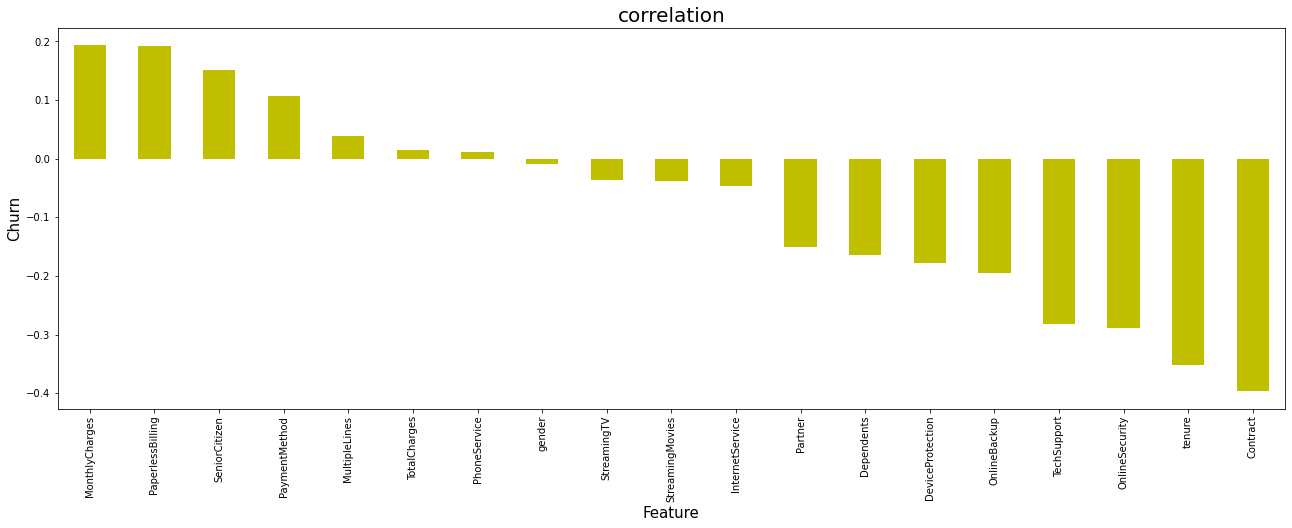

In [76]:
plt.figure(figsize=(22,7))
data.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Churn', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

# Check the skewness and remove that

In [77]:
data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

As we see there are no variables are skewed, whoes value is not lies between -0.5 to +0.5 this range as well as they are contineous in nature.

Check outliers datatype. If data types of skewed column is catogorical than no need to remove skewness from that variable.


# Seprating the columns into featuers and target:

X= features, y=Target


In [78]:
x = data.drop(columns = 'Churn', axis=1)
y = data['Churn']

In [79]:
#import Libraries
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)

# Sampling

In [80]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

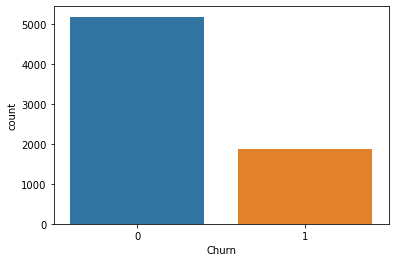

In [81]:
#visualization of target variable 
sn.countplot(data["Churn"])
plt.show()

As we can see there is class imbalance in target varibale, so we need to balance that with sampling otherwise the model will get bias.

# Oversampling

In [82]:
from imblearn.over_sampling import RandomOverSampler  #Random Over Sampler
ROS = RandomOverSampler()
x_res, y_res = ROS.fit_resample(x_scaled, y) # it will resample the data
print(y_res.value_counts()) # after this all classes will be balaned

0    5174
1    5174
Name: Churn, dtype: int64


In [83]:
y_res.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

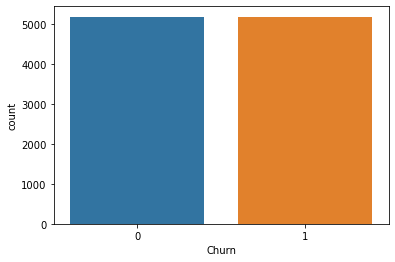

In [84]:
#visualization of target variable 
sn.countplot(y_res)
plt.show()

# Variance inflation factor

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_res, i) for i in range(x_res.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.005187,gender
1,1.151099,SeniorCitizen
2,1.465927,Partner
3,1.387511,Dependents
4,2.924703,tenure
5,1.747826,PhoneService
6,1.384722,MultipleLines
7,1.690889,InternetService
8,1.299510,OnlineSecurity
9,1.215521,OnlineBackup


as we have saw in the table vif value is not greater than 5, so we can proceed further.

# Finding best random state

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [87]:
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=.30, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.8731078904991948 on Random_state  100


In [89]:
x_train,x_test,y_train,y_test = train_test_split(x_res, y_res, test_size=0.25, random_state = 100)

# 1.Logistic Regression Model

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Log_reg =LogisticRegression()
Log_reg.fit(x_train, y_train)

LogisticRegression()

In [91]:
pred_test=Log_reg.predict(x_test)

In [92]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7738693467336684
[[ 955  346]
 [ 239 1047]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1301
           1       0.75      0.81      0.78      1286

    accuracy                           0.77      2587
   macro avg       0.78      0.77      0.77      2587
weighted avg       0.78      0.77      0.77      2587



In [93]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Log_reg, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7624672004258866

The Accuracy score for logistic regression model is : 77.38%
Cross validation score for logistic regression is : 76.24%


# 2.Random forest Classifier

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={'criterion':['gini', 'entropy'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestClassifier()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt'}


In [95]:
Rfr =RandomForestClassifier(criterion = "gini", max_features="auto")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = accuracy_score(y_test,pred_decision)
print('accuracy score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x_res, y_res, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

accuracy score:  90.14302280633939
Cross Val Score:  89.08015065628489


The Accuracy score for Random Forest Classifier model is : 90.14%
Cross validation score for Random Forest Classifier is : 89.08%

# 3.Decision Tree Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [97]:
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))

0.872825666795516


In [98]:
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

[[1057  244]
 [  85 1201]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1301
           1       0.83      0.93      0.88      1286

    accuracy                           0.87      2587
   macro avg       0.88      0.87      0.87      2587
weighted avg       0.88      0.87      0.87      2587



In [99]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(DT, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8735045285477125

The Accuracy score for Decision tree Classifier model is : 87.28%
Cross validation score for Decision tree Classifier is : 87.35%

# 4.Support vector Classifier

In [100]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [101]:
pred_sv = sv.predict(x_test)
print(accuracy_score(y_test,pred_sv))

0.7889447236180904


In [102]:
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

[[ 962  339]
 [ 207 1079]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1301
           1       0.76      0.84      0.80      1286

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587



In [103]:
cv_score= cross_val_score(sv, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7850811262646428

The Accuracy score for SVC model is : 78.89%

Cross validation score for SVC is : 78.50%

# Comparison of all model

The difference between Cross validation score and logistic regression model is: 1.14%

The difference between Cross validation score and Random Forest Classifier model is: 0.06%

The difference between Cross validation score and Decision tree Classifier model is: 0.07%
    
The difference between Cross validation score and SVC model is: 0.39%

# As shown above Random Forest Classifier having minimum low difference so we choose this model for Hyperparameter tuning

# Hyper parameter tunning

In [104]:
#Random forest Classifier

Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['gini', 'entropy']}


In [105]:
GCV=GridSearchCV(RandomForestClassifier(),Parameters,cv=5)

In [106]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [107]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

# Final Model

In [112]:
mod = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 700)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

82.18013142636258


# after hyper parameter tunning accuracy score is: 82.29%

# Boosting of model with adaboost

In [113]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [114]:
ada.fit(x_train, y_train)
y_pred = ada.predict(x_train)

In [116]:
from sklearn import metrics
print('accuracy square score', metrics.accuracy_score(y_train, y_pred))

accuracy square score 0.770390413606494


# ROC AUC curve to choose best model

In [117]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [118]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

In [119]:
#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
sv.fit(x_train, y_train)

print("Now all models are trained")

Now all models are trained


In [120]:
#All model score captured

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
sv.score(x_train, y_train)

print("all model test score captured")

all model test score captured


# find ROC AUC Score

In [121]:
#logistic Regression
roc_auc_score(y_test, lr.predict(x_test))

0.7741015703914801

In [122]:
# Random Forest Classifier
roc_auc_score(y_test, rf.predict(x_test))

0.9017608778030538

In [123]:
#Decision Tree Classifier
roc_auc_score(y_test, dt.predict(x_test))

0.8712472042680414

In [124]:
#SVC
roc_auc_score(y_test, sv.predict(x_test))

0.7892334882964772

# Ploting AUC ROC curve

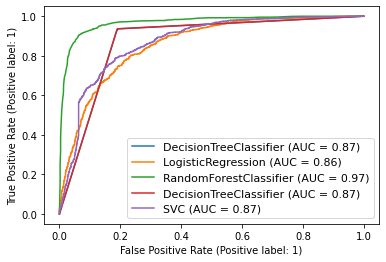

In [125]:
disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)

plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':11}, loc='lower right')

plt.show()

# Saving the model

In [126]:
import joblib
joblib.dump(mod,"CustomerChurnAna.pkl")

['CustomerChurnAna.pkl']

# Loding model

In [127]:
model = joblib.load("CustomerChurnAna.pkl")

In [128]:
prediction = model.predict(x_test)


In [129]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [130]:
prediction.to_csv('CustomerChurnAnaResults.csv', index = False)
#prediction saving

# Model Saved